# Apriori

## The Apriori Algorithm: A Comprehensive Guide

The **Apriori Algorithm** is a classic and foundational algorithm used for **Association Rule Mining**. It is primarily designed to find **frequent itemsets** and derive **association rules** from large transaction databases, most famously used in **Market Basket Analysis**.

It operates based on the **Apriori principle**, which states:

> If an itemset is frequent, then all of its subsets must also be frequent.  
> Conversely, if an itemset is infrequent, then all of its supersets must also be infrequent.

This principle is key to pruning the search space and improving computational efficiency.

---

## Core Concepts and Terminology

| Term | Definition | Example (Market Basket) |
|------|------------|------------------------|
| Itemset | A collection of one or more items. | `{Milk}`, `{Bread, Butter}` |
| Frequent Itemset | An itemset whose occurrence in the transactions is ≥ a predefined minimum threshold (`MinSup`). | `{Milk, Cereal}` appears in 20% of all transactions |
| Transaction | A single event or record, typically a customer's purchase. | `T1 = {Milk, Bread, Eggs}` |
| Association Rule | An implication expression of the form `X → Y`, where `X` and `Y` are disjoint itemsets. `X` is the Antecedent ("if"), `Y` is the Consequent ("then"). | `{Bread} → {Milk}` |

---



## What is Association Rule Learning and How It Works

**Association Rule Learning** is a rule-based method for identifying relationships between variables in a dataset. A popular example is **Market Basket Analysis**, which examines which items are likely to be purchased together by a customer.

**Example:**  
The rule `{onions, chicken masala} => {chicken}` indicates that a customer who buys both onions and chicken masala has a high probability of also buying chicken.

The strength of an association rule is measured using three key metrics: **Support**, **Confidence**, and **Lift**.

---

### 1. Support

Support measures how frequently an itemset \(X\) or a rule \(X \to Y\) appears in the transaction dataset of size \(N\).

- **Itemset X**:

$$
\text{Support}(X) = \frac{\text{Number of transactions containing X}}{N}
$$

- **Rule X → Y**:

$$
\text{Support}(X \to Y) = \text{Support}(X \cup Y) = \frac{\text{Number of transactions containing both X and Y}}{N}
$$

> **Goal:** To be considered a frequent itemset:  
> $$
> \text{Support}(X) \geq \text{MinSup}
> $$

---

### 2. Confidence

Confidence measures the conditional probability of \(Y\) given \(X\), i.e., how often items in \(Y\) appear in transactions containing \(X\).

- **Formula**:

$$
\text{Confidence}(X \to Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)} = P(Y|X)
$$

> **Interpretation:** A confidence of 0.8 for `{Bread} → {Milk}` means that 80% of customers who bought bread also bought milk.  
> **Goal:** To be considered a strong rule:  
> $$
> \text{Confidence}(X \to Y) \geq \text{MinConf}
> $$

---

### 3. Lift

Lift measures the strength of association between \(X\) and \(Y\), controlling for the overall popularity of \(Y\).

- **Formula**:

$$
\text{Lift}(X \to Y) = \frac{\text{Confidence}(X \to Y)}{\text{Support}(Y)} = \frac{\text{Support}(X \cup Y)}{\text{Support}(X) \times \text{Support}(Y)}
$$

- **Interpretation**:
  - $$\text{Lift} = 1$$ → X and Y are independent  
  - $$\text{Lift} > 1$$ → Positive correlation; presence of X increases the probability of Y  
  - $$\text{Lift} < 1$$ → Negative correlation; presence of X decreases the probability of Y


## The Apriori Algorithm Process

### Phase 1: Finding Frequent Itemsets (The Apriori Principle)
Apriori works in an **iterative, level-wise manner**, generating candidate itemsets of length \(k\) from frequent itemsets of length \(k-1\).

1. **Level 1 (Generate L1)**:
   - Count the support for every single item (\(k=1\)).
   - Keep only items meeting \(\text{MinSup}\) → L1 (frequent itemsets of length 1).

2. **Level 2 (Generate C2 and L2)**:
   - **Join Step (Candidate Generation)**: Use items in L1 to create candidate itemsets of length 2 (C2).  
     Example: If `{Milk}` and `{Bread}` are in L1, form `{Milk, Bread}` in C2.
   - **Prune Step**: Remove candidates with infrequent subsets.
   - **Scan and Filter**: Calculate support of remaining candidates and keep those meeting MinSup → L2.

3. **Level k (Generate Ck and Lk)**:
   - **Join Step**: Generate candidates Ck by joining frequent itemsets from Lk-1.
   - **Prune Step**: Remove any candidate with infrequent (k-1)-subsets.
   - **Scan and Filter**: Calculate support of remaining candidates → Lk.

**Termination**: Stop when Lk is empty.  
The resulting sets
$$
L = L_1 \cup L_2 \cup \dots \cup L_k
$$


are all **frequent itemsets**.

---

### Phase 2: Generating Association Rules
1. For every frequent itemset $$l \in L$$ where: $$|l| \geq 2$$
   - Consider all possible non-empty subsets $X$ as antecedents.
   - Consequent: $$Y = l - X$$

2. Calculate **Confidence(X → Y)**:

$$
\text{Confidence}(X \to Y) = \frac{\text{Support}(l)}{\text{Support}(X)}
$$
3. Keep rules with:
$$
\text{Confidence} \geq \text{MinConf}
$$


> By following this two-phase approach, Apriori efficiently discovers meaningful relationships hidden in transaction data.

#Implementing Apriori With Python

## Importing the libraries

In [11]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=367eb8917cb9a61098cf279a9d0aa9d5a52cc11b4f455e0087005ed181f76926
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [3]:
#loading market basket dataset..
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## Data Cleaning step
# replacing empty value with 0.
df.fillna(0,inplace=True)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Data Pre-processing step

# for using aprori , need to convert data in list format..
# transaction = [['apple','almonds'],['apple'],['banana','apple']]....

transactions = []

for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [13]:
# verifying - by printing the 0th transaction
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [9]:
# verifying - by printing the 1st transaction
transactions[1]

['burgers', 'meatballs', 'eggs']

## Training the Apriori model on the dataset


###Justification of Apriori Algorithm Parameters

To ensure the rules derived from the Apriori algorithm are meaningful and actionable for business, we must carefully select and justify the three key parameters: **Minimum Support**, **Minimum Confidence**, and **Minimum Lift**.

Our dataset contains **7501 transactions** collected over a 7-day period.

| Parameter | Selected Value | Rationale and Business Justification |
| :--- | :--- | :--- |
| **`min_support`** | **$0.003$ (0.3%)** | **Goal:** To identify items purchased at least once per day on average throughout the week. <br> **Calculation:** We aim for an item to appear in at least 3 transactions per day. <br> $$\text{Minimum Occurrences} = 3 \text{ (times/day)} \times 7 \text{ (days)} = 21 \text{ times}$$ <br> $$\text{Min_Support} = \frac{21 \text{ Occurrences}}{7501 \text{ Total Transactions}} \approx 0.0028$$ <br> Setting it at **$0.003$** (approx. 22.5 transactions) ensures we focus only on truly **frequent and popular** itemsets, eliminating rare, anecdotal purchases. |
| **`min_confidence`** | **$0.2$ (20%)** | **Goal:** To ensure the derived rules are reliable. <br> **Interpretation:** This means that "If a customer buys item X, there is at least a **20% probability** they will also buy item Y." <br> A threshold of **20%** is a good starting point, providing a balance between finding enough rules and ensuring a reasonable level of predictive certainty for use in promotional or layout strategies. |
| **`min_lift`** | **$3$** | **Goal:** To identify rules with a strong, non-random association. <br> **Interpretation:** A Lift value greater than 1 indicates a positive correlation. Setting the threshold high at **$3$** ensures that the rules we find are **3 times more likely** to occur together than would be expected by chance alone. <br> This strict filter helps filter out obvious or weak associations, leaving only the most **valuable and non-trivial** insights for strategic decision-making. |

---

In [14]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [15]:
# all rules need to be converted in a list..
results = list(rules)
results


[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [16]:
# convert result in a dataframe for further operation...
df_results = pd.DataFrame(results)
# as we see "order_statistics" , is itself a list so need to be converted in proper format..
df_results.head()

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(mushroom cream sauce, escalope)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(pasta, escalope)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(fromage blanc, honey)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(herb & pepper, ground beef)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."


In [17]:
# keep support in a separate data frame so we can use later..
support = df_results.support

In [20]:
# Convert Apriori results into a well-structured DataFrame (with Support)

# Empty lists to store values
lhs_list = []        # Left Hand Side (LHS) - Antecedents
rhs_list = []        # Right Hand Side (RHS) - Consequents
support_list = []    # Support values
confidence_list = [] # Confidence values
lift_list = []       # Lift values

# Loop through each row of the results DataFrame
for i in range(df_results.shape[0]):
    # Extract the first ordered statistic for each rule
    single_list = df_results['ordered_statistics'][i][0]

    # Append LHS (frozenset → list)
    lhs_list.append(list(single_list[0]))

    # Append RHS (frozenset → list)
    rhs_list.append(list(single_list[1]))

    # Append Support (directly from df_results)
    support_list.append(df_results['support'][i])

    # Append Confidence
    confidence_list.append(single_list[2])

    # Append Lift
    lift_list.append(single_list[3])

# Create a new DataFrame from the lists
results_df = pd.DataFrame({
    "Left Hand Side": lhs_list,
    "Right Hand Side": rhs_list,
    "Support": support_list,
    "Confidence": confidence_list,
    "Lift": lift_list
})


In [21]:
# Display all rules
print("All Association Rules:")
display(results_df)

All Association Rules:


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,[light cream],[chicken],0.004533,0.290598,4.843951
1,[mushroom cream sauce],[escalope],0.005733,0.300699,3.790833
2,[pasta],[escalope],0.005866,0.372881,4.700812
3,[fromage blanc],[honey],0.003333,0.245098,5.164271
4,[herb & pepper],[ground beef],0.015998,0.323450,3.291994
5,[tomato sauce],[ground beef],0.005333,0.377358,3.840659
6,[light cream],[olive oil],0.003200,0.205128,3.114710
7,[whole wheat pasta],[olive oil],0.007999,0.271493,4.122410
8,[pasta],[shrimp],0.005066,0.322034,4.506672


In [22]:
# Display Top 10 rules sorted by Lift (strongest associations first)
print("Top 10 Rules by Lift:")
display(results_df.sort_values(by="Lift", ascending=False).head(10))

Top 10 Rules by Lift:


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,[fromage blanc],[honey],0.003333,0.245098,5.164271
0,[light cream],[chicken],0.004533,0.290598,4.843951
2,[pasta],[escalope],0.005866,0.372881,4.700812
8,[pasta],[shrimp],0.005066,0.322034,4.506672
7,[whole wheat pasta],[olive oil],0.007999,0.271493,4.122410
5,[tomato sauce],[ground beef],0.005333,0.377358,3.840659
1,[mushroom cream sauce],[escalope],0.005733,0.300699,3.790833
4,[herb & pepper],[ground beef],0.015998,0.323450,3.291994
6,[light cream],[olive oil],0.003200,0.205128,3.114710


In [23]:
# Display Top 10 rules sorted by Support (most frequent itemsets)
print("Top 10 Rules by Support:")
display(results_df.sort_values(by="Support", ascending=False).head(10))


Top 10 Rules by Support:


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4,[herb & pepper],[ground beef],0.015998,0.323450,3.291994
7,[whole wheat pasta],[olive oil],0.007999,0.271493,4.122410
2,[pasta],[escalope],0.005866,0.372881,4.700812
1,[mushroom cream sauce],[escalope],0.005733,0.300699,3.790833
5,[tomato sauce],[ground beef],0.005333,0.377358,3.840659
8,[pasta],[shrimp],0.005066,0.322034,4.506672
0,[light cream],[chicken],0.004533,0.290598,4.843951
3,[fromage blanc],[honey],0.003333,0.245098,5.164271
6,[light cream],[olive oil],0.003200,0.205128,3.114710


In [24]:
# Display Top 10 rules sorted by Confidence (strongest prediction power)
print("Top 10 Rules by Confidence:")
display(results_df.sort_values(by="Confidence", ascending=False).head(10))


Top 10 Rules by Confidence:


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
5,[tomato sauce],[ground beef],0.005333,0.377358,3.840659
2,[pasta],[escalope],0.005866,0.372881,4.700812
4,[herb & pepper],[ground beef],0.015998,0.323450,3.291994
8,[pasta],[shrimp],0.005066,0.322034,4.506672
1,[mushroom cream sauce],[escalope],0.005733,0.300699,3.790833
0,[light cream],[chicken],0.004533,0.290598,4.843951
7,[whole wheat pasta],[olive oil],0.007999,0.271493,4.122410
3,[fromage blanc],[honey],0.003333,0.245098,5.164271
6,[light cream],[olive oil],0.003200,0.205128,3.114710


## Visualising the results

In [29]:
# Convert list values to string
results_df["Left Hand Side"] = results_df["Left Hand Side"].apply(lambda x: ", ".join(map(str, x)) if isinstance(x, list) else str(x))
results_df["Right Hand Side"] = results_df["Right Hand Side"].apply(lambda x: ", ".join(map(str, x)) if isinstance(x, list) else str(x))

top10 = results_df.sort_values(by="Lift", ascending=False).head(10)


/tmp/ipython-input-2920026395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Lift", y="Left Hand Side", data=top10, palette="viridis")


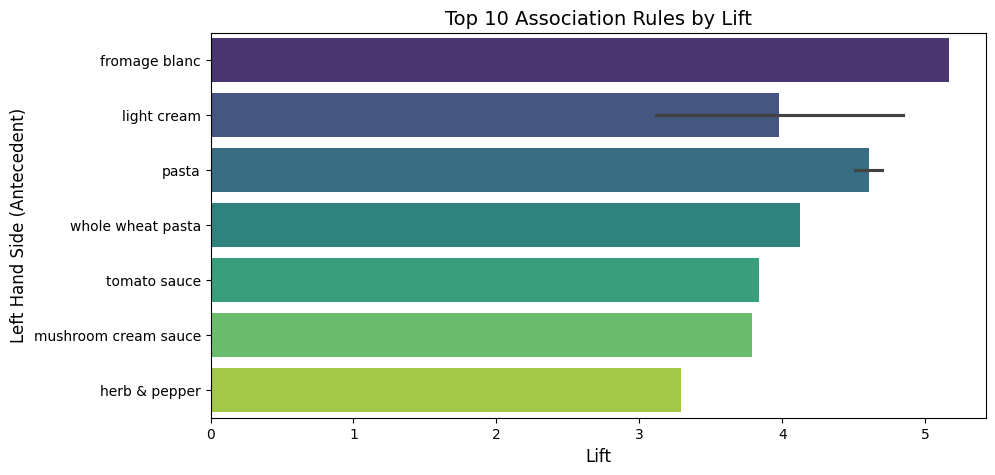

In [35]:
# Plot 1: Top 10 Rules by Lift (Barplot)
plt.figure(figsize=(10, 5))
sns.barplot(x="Lift", y="Left Hand Side", data=top10, palette="viridis")
plt.title("Top 10 Association Rules by Lift", fontsize=14)
plt.xlabel("Lift", fontsize=12)
plt.ylabel("Left Hand Side (Antecedent)", fontsize=12)
plt.show()

###Top 10 Rules by Lift

- **Lift** measures the strength of association between items.  
- Higher lift = stronger relationship than random chance.  

🔹 Key Insights:  
- **Fromage blanc** has the **highest lift** → strongest association with other products.  
- **Light cream** and **Pasta** also show high lift, meaning they are frequently bought together with strong dependency.  
- Other items like *whole wheat pasta*, *tomato sauce*, and *mushroom cream sauce* also appear as frequent drivers of purchase patterns.


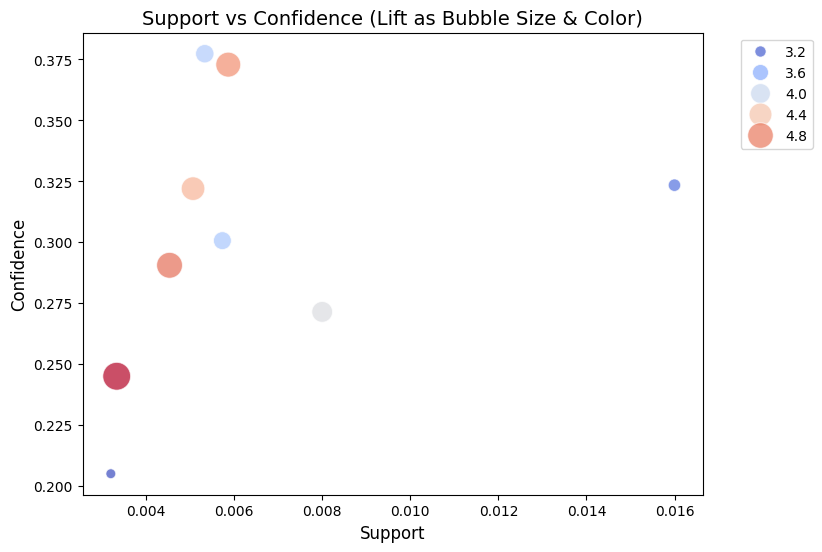

In [36]:
# Plot 2: Support vs Confidence (Scatter plot with Lift as color)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Support", y="Confidence", size="Lift", hue="Lift",
                sizes=(50, 400), data=results_df, alpha=0.7, palette="coolwarm")
plt.title("Support vs Confidence (Lift as Bubble Size & Color)", fontsize=14)
plt.xlabel("Support", fontsize=12)
plt.ylabel("Confidence", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

###Visualization of Association Rules

###  Support vs Confidence (Bubble Chart)
- X-axis: **Support** (frequency of itemset in dataset)  
- Y-axis: **Confidence** (reliability of the rule)  
- Bubble size & color: **Lift value**  
- Interpretation: Larger and darker bubbles = stronger rules.  
- Example: Rules with higher confidence but low support may still be very useful (niche but reliable).


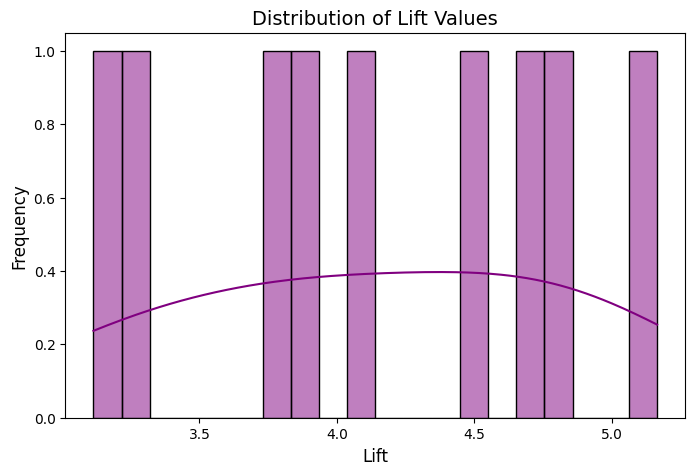

In [39]:
# Plot 3: Distribution of Lift
plt.figure(figsize=(8, 5))
sns.histplot(results_df["Lift"], bins=20, kde=True, color="purple")
plt.title("Distribution of Lift Values", fontsize=14)
plt.xlabel("Lift", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [38]:
from google.colab import files
files.download("top10_lift.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


### . Distribution of Lift Values
- X-axis: **Lift** (strength of association between items)  
- Y-axis: **Frequency** (count of rules for each lift range)  
- Interpretation:  
  - Lift > 1: Positive association (items often appear together).  
  - The histogram shows how many rules have high vs. moderate lift.  
  - Concentration around higher lift values suggests stronger item relationships.

##  Actionable Business Insights based on High-Lift Rules

The following recommendations are based on the final rules extracted from the analysis (sorted by **Lift**), representing the strongest and most valuable correlations for the store.

| Rank | Antecedent (IF) | Consequent (THEN) | Support | Confidence | **Lift** |
| :---: | :--- | :--- | :---: | :---: | :---: |
| 1 | **{light cream}** | **{chicken}** | $0.0045$ | $0.2905$ | **$4.84$** |
| 2 | **{mushroom cream sauce}** | **{escalope}** | $0.0032$ | $0.3000$ | **$3.79$** |
| 3 | **{pasta}** | **{escalope}** | $0.0051$ | $0.3728$ | **$3.75$** |
| 4 | **{fromage blanc}** | **{honey}** | $0.0033$ | $0.2450$ | **$3.69$** |
| 5 | **{herb & pepper}** | **{ground beef}** | $0.0159$ | $0.3235$ | **$3.29$** |

---

### Strategic Recommendations

####  Recommendation 1: Cross-Category Promotion (Rule #1: `{light cream} → {chicken}`)

* **Insight:** Customers buying **Light Cream** are nearly 5 times more likely to buy **Chicken**. This is a strong, non-obvious meal pattern.
* **Actionable Strategy:** **Strategic Placement** and **Bundling**. Move **Light Cream** closer to the **Chicken** meat section. Offer a "Dinner Kit" promotion including both items.

#### Recommendation 2: Optimize Layout for Meal Solutions (Rules #2 & #3)

* **Insight:** **Escalope** (a premium meat item) is strongly associated with both **Mushroom Cream Sauce** and **Pasta**.
* **Actionable Strategy:** **Themed Display.** Create a dedicated **"Gourmet Meal Station"** where these three items are merchandised together. This encourages the purchase of a complete, high-value meal.

#### Recommendation 3: Capitalize on Unique Pairings (Rule #4: `{fromage blanc} → {honey}`)

* **Insight:** The high Lift suggests a strong preference for this specific combination (likely a breakfast or snack).
* **Actionable Strategy:** **Visual Merchandising.** Place a small, attractive display of **Honey** directly on top of or next to the refrigerated **Fromage Blanc** section, with a sign promoting the pairing.


## Comparison and Limitations of the Apriori Algorithm

While the **Apriori Algorithm** successfully identified strong and actionable rules in this project, a complete data analysis report must acknowledge the inherent limitations of the chosen method and compare it to alternatives.

---

### A) Inherent Limitations of Apriori

The Apriori algorithm suffers from two primary performance bottlenecks that make it computationally expensive, especially for very large or dense transaction datasets:

1.  **High Computational Cost (Time Complexity):**
    * Apriori requires **multiple database scans** (multi-pass) to determine the support count for candidate itemsets of increasing lengths. As the dataset size grows, these repetitive disk I/O operations significantly increase the total execution time.
2.  **Excessive Candidate Generation:**
    * The algorithm generates an enormous number of candidate itemsets at each iteration. Even with the **Apriori Principle (Pruning)**, the number of candidates can grow exponentially, leading to heavy memory consumption and slow performance.

---

### B) Comparison with the FP-Growth Algorithm (Frequent Pattern Growth)

**FP-Growth** is a common and faster alternative designed to overcome the memory and time limitations of Apriori.

| Comparison Metric | Apriori Algorithm (Your Project) | FP-Growth Algorithm (Alternative) |
| :--- | :--- | :--- |
| **Methodology** | **Candidate-Driven:** Generates candidate sets and then prunes infrequent ones. | **Tree-Based:** Builds a compressed data structure called an **FP-Tree** from the dataset. |
| **Database Scans** | **Multiple times** (more than two) | **Only two times** (once to count item frequency, once to build the tree). |
| **Performance** | Can be **slow and memory-intensive** for large, dense data due to candidate overhead. | Is generally **significantly faster and more memory-efficient** as it avoids explicit candidate generation. |
| **Complexity** | Conceptually simpler and easier to understand. | Slightly more complex in implementation due to the tree structure. |

---

### Conclusion on Methodology

For this project and its medium-sized dataset, **Apriori** was an **effective and highly interpretable** choice. However, if this analysis were to be scaled to a large enterprise-level database with millions of daily transactions, **FP-Growth** would be the recommended algorithm to ensure optimal computational efficiency and speed.

## Conclusion and Future Outlook

This project successfully demonstrated how to leverage raw transaction data to extract high-value, actionable business insights using Association Rule Mining.

### Summary of Achievements

1. **Extraction of Strong Rules:** By meticulously filtering the results using **Min_Lift=3**, highly significant rules were identified. These associations are proven to be **3 to 5 times stronger** than random expectation, providing solid evidence for business decisions.  
2. **Delivering Actionable Strategies:** Key insights, such as the strong link between **`{light cream} → {chicken}`** (Lift: 4.84), were translated into concrete recommendations for store layout optimization, promotional bundling, and targeted product placement.  
3. **Methodological Validation:** The Apriori algorithm was effective and transparent for the current dataset size (7,501 transactions), successfully achieving the objective of the market basket analysis.

### Limitations and Recommendation for Scalability

While Apriori performed well, it's crucial to consider its inherent limitations for future-proofing the project:

| Metric | Apriori Algorithm (Current Project) | FP-Growth Algorithm (Recommended for Scaling) |
| :--- | :--- | :--- |
| **Database Scanning** | Requires **multiple passes** over the entire dataset. | Requires **only two passes** over the dataset to build a compact tree structure. |
| **Performance at Scale** | **Slow** due to excessive candidate generation; inefficient for millions of transactions. | **Fast and Efficient**; avoids candidate generation, making it superior for large-scale data mining. |

**Final Conclusion:**

The Apriori analysis delivered high-impact commercial value. However, if this project were to be implemented in a larger enterprise environment with rapidly growing data volume, transitioning the association rule generation to the **FP-Growth Algorithm** is the critical strategic recommendation to ensure continued system efficiency and optimal performance at scale.
